In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv 
import numpy as np
 
start_value1= 1e-04
end_value1 = 8e-04


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)

csv_file = 'combinations.csv'  
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

print(array)


[0.0001     0.00012414 0.00014828 0.00017241 0.00019655 0.00022069
 0.00024483 0.00026897 0.0002931  0.00031724 0.00034138 0.00036552
 0.00038966 0.00041379 0.00043793 0.00046207 0.00048621 0.00051034
 0.00053448 0.00055862 0.00058276 0.0006069  0.00063103 0.00065517
 0.00067931 0.00070345 0.00072759 0.00075172 0.00077586 0.0008    ]


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns = t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df

Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.1,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.2,4.293339,4.293339,4.293339,4.293338,4.293333,4.293317,4.293279,4.293202,4.293070,4.292863,...,4.283030,4.281445,4.279768,4.278010,4.276176,4.274277,4.272319,4.270310,4.268257,4.266167
0.3,4.293339,4.293339,4.293338,4.293329,4.293292,4.293187,4.292952,4.292518,4.291815,4.290782,...,4.253755,4.248515,4.243092,4.237516,4.231814,4.226012,4.220135,4.214204,4.208240,4.202262
0.4,4.293339,4.293339,4.293333,4.293295,4.293149,4.292765,4.291977,4.290616,4.288539,4.285641,...,4.203270,4.192850,4.182245,4.171510,4.160698,4.149853,4.139016,4.128223,4.117506,4.106892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,2.313540,1.724626,1.307485,1.013783,0.804145,0.651443,0.537822,0.451568,0.384905,0.332597,...,0.128654,0.123563,0.119336,0.115840,0.112960,0.110599,0.108674,0.107207,0.106034,0.105072
49.7,2.311024,1.722307,1.305496,1.012121,0.802762,0.650288,0.536850,0.450744,0.384202,0.331991,...,0.128515,0.123443,0.119232,0.115750,0.112884,0.110534,0.108619,0.107165,0.105998,0.105042
49.8,2.308513,1.719995,1.303513,1.010463,0.801383,0.649136,0.535882,0.449924,0.383501,0.331388,...,0.128377,0.123323,0.119129,0.115662,0.112808,0.110470,0.108565,0.107123,0.105963,0.105012
49.9,2.306007,1.717688,1.301537,1.008811,0.800009,0.647990,0.534918,0.449106,0.382803,0.330788,...,0.128240,0.123204,0.119027,0.115574,0.112733,0.110406,0.108512,0.107081,0.105927,0.104982


(0.0, 50.0)

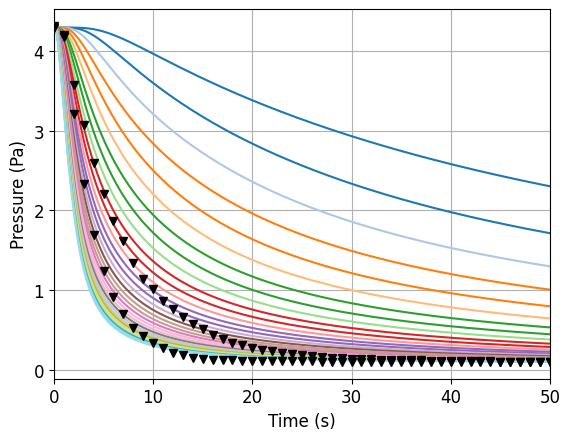

In [3]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['TT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0,50)

minimum RMSE position:  18
minimum particle_diameter:  particle_diameter_1    0.000534
Name: 18, dtype: float64


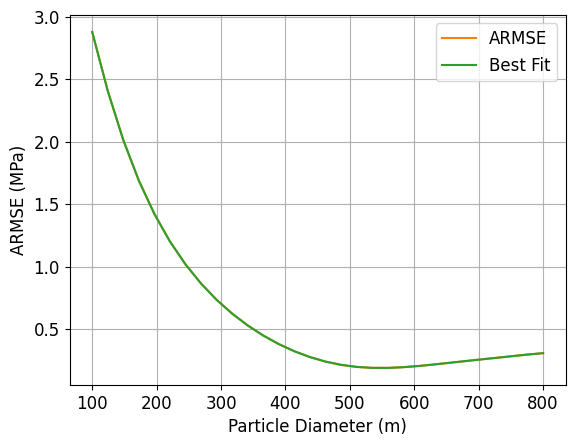

In [4]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)

parameters = pd.read_csv('combinations.csv')*1e6
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Particle Diameter (m)', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12) 
plt.grid()

minimum RMSE position:  12
minimum particle_diameter:  particle_diameter_1    0.00039
Name: 12, dtype: float64


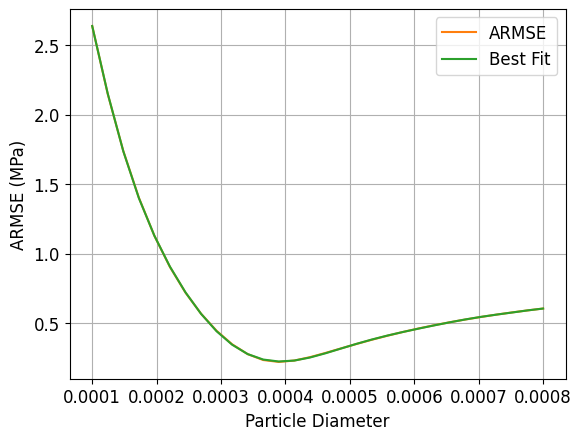

In [5]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)

parameters = pd.read_csv('combinations.csv')*1
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])


plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Particle Diameter', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

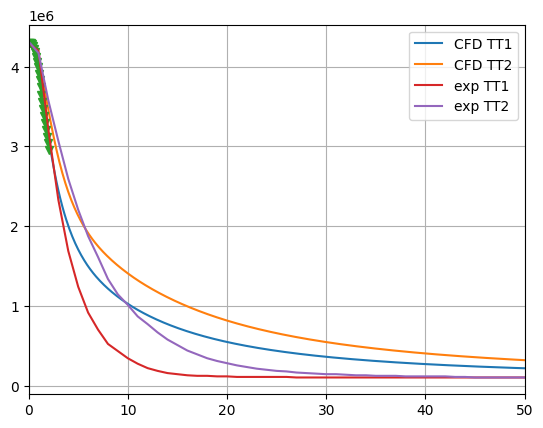

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

data20 = pd.read_csv('TT1.csv')
trial = pd.read_csv('model_pellets_out.csv')
TT1_1 = pd.read_csv('model_pellets_1.csv')
TT1_2 = pd.read_csv('model_pellets_2.csv')
plt.plot(TT1_1['time'], TT1_1['inlet-p'], label = 'CFD TT1')
plt.plot(TT1_2['time'], TT1_2['inlet-p'], label = 'CFD TT2')
plt.plot(trial['time'], trial['inlet-p'], marker = 'v')
plt.plot(data20['time'], data20['TT1_600_1'], label = 'exp TT1')
plt.plot(data20['time'], data20['TT1_600_2'], label = 'exp TT2')
plt.grid()
plt.xlim(0, 50)
plt.legend()